In [8]:
import cv2 # opencv 
from PIL import Image   # pillow 
import numpy as np 


In [4]:
pwd 

'C:\\Users\\Ranjit\\Desktop\\JECRC-20april2024\\CNN'

In [5]:
ls 

 Volume in drive C has no label.
 Volume Serial Number is 9C35-B5F9

 Directory of C:\Users\Ranjit\Desktop\JECRC-20april2024\CNN

27-05-2024  13:39    <DIR>          .
27-05-2024  13:39    <DIR>          ..
27-05-2024  13:33    <DIR>          .ipynb_checkpoints
27-05-2024  13:39               870 cnn.ipynb
12-01-2024  15:52    <DIR>          Data
               1 File(s)            870 bytes
               4 Dir(s)  35,203,436,544 bytes free


In [6]:
path = r"C:\Users\Ranjit\Desktop\JECRC-20april2024\CNN\Data\images\cats\cat_1.jpg"

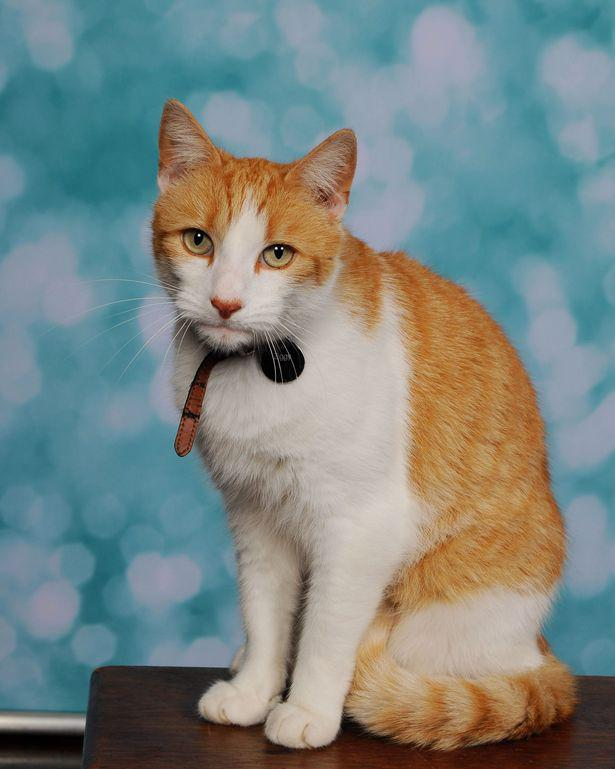

In [10]:
cat  = Image.open(path)
cat 

In [13]:
cat_image  = np.array(cat)
cat_image 

array([[[ 94, 143, 158],
        [ 94, 143, 158],
        [ 97, 143, 159],
        ...,
        [ 83, 147, 159],
        [ 84, 148, 160],
        [ 85, 149, 161]],

       [[ 92, 141, 156],
        [ 93, 142, 157],
        [ 96, 142, 158],
        ...,
        [ 82, 146, 158],
        [ 84, 148, 160],
        [ 84, 148, 160]],

       [[ 90, 139, 154],
        [ 91, 140, 155],
        [ 94, 140, 155],
        ...,
        [ 82, 146, 158],
        [ 83, 147, 159],
        [ 84, 148, 160]],

       ...,

       [[ 43,  45,  42],
        [ 40,  45,  41],
        [ 41,  43,  40],
        ...,
        [ 58,  43,  40],
        [ 58,  43,  40],
        [ 58,  43,  40]],

       [[ 38,  40,  37],
        [ 35,  40,  36],
        [ 35,  37,  34],
        ...,
        [ 53,  38,  35],
        [ 51,  36,  33],
        [ 50,  35,  32]],

       [[ 35,  35,  35],
        [ 34,  36,  35],
        [ 35,  35,  35],
        ...,
        [ 54,  39,  36],
        [ 53,  38,  35],
        [ 58,  43,  40]]

In [14]:
cat_image.shape 

(769, 615, 3)

In [15]:
img_dir_path = r"C:\Users\Ranjit\Desktop\Data_science_coding_examples\Deep learning\CNN\Dog_cat\Data\images"

In [16]:
import os 

In [22]:
path_dict = {'cats':[],'dogs':[]}
for dir in os.listdir(img_dir_path): 
    directory_path = os.path.join(img_dir_path,dir)
    for img_name in os.listdir(directory_path):
        image_path = os.path.join(directory_path,img_name)
        path_dict[dir].append(image_path)

In [23]:
path_dict

{'cats': ['C:\\Users\\Ranjit\\Desktop\\Data_science_coding_examples\\Deep learning\\CNN\\Dog_cat\\Data\\images\\cats\\cat_1.jpg',
  'C:\\Users\\Ranjit\\Desktop\\Data_science_coding_examples\\Deep learning\\CNN\\Dog_cat\\Data\\images\\cats\\cat_10.jpg',
  'C:\\Users\\Ranjit\\Desktop\\Data_science_coding_examples\\Deep learning\\CNN\\Dog_cat\\Data\\images\\cats\\cat_100.jpg',
  'C:\\Users\\Ranjit\\Desktop\\Data_science_coding_examples\\Deep learning\\CNN\\Dog_cat\\Data\\images\\cats\\cat_101.jpg',
  'C:\\Users\\Ranjit\\Desktop\\Data_science_coding_examples\\Deep learning\\CNN\\Dog_cat\\Data\\images\\cats\\cat_102.jpg',
  'C:\\Users\\Ranjit\\Desktop\\Data_science_coding_examples\\Deep learning\\CNN\\Dog_cat\\Data\\images\\cats\\cat_103.jpg',
  'C:\\Users\\Ranjit\\Desktop\\Data_science_coding_examples\\Deep learning\\CNN\\Dog_cat\\Data\\images\\cats\\cat_104.jpg',
  'C:\\Users\\Ranjit\\Desktop\\Data_science_coding_examples\\Deep learning\\CNN\\Dog_cat\\Data\\images\\cats\\cat_106.jpg',
  '

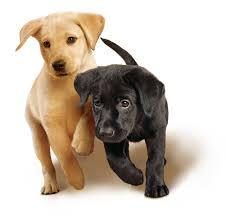

In [31]:
path_dict['dogs'][0]
Image.open(path_dict['dogs'][35])

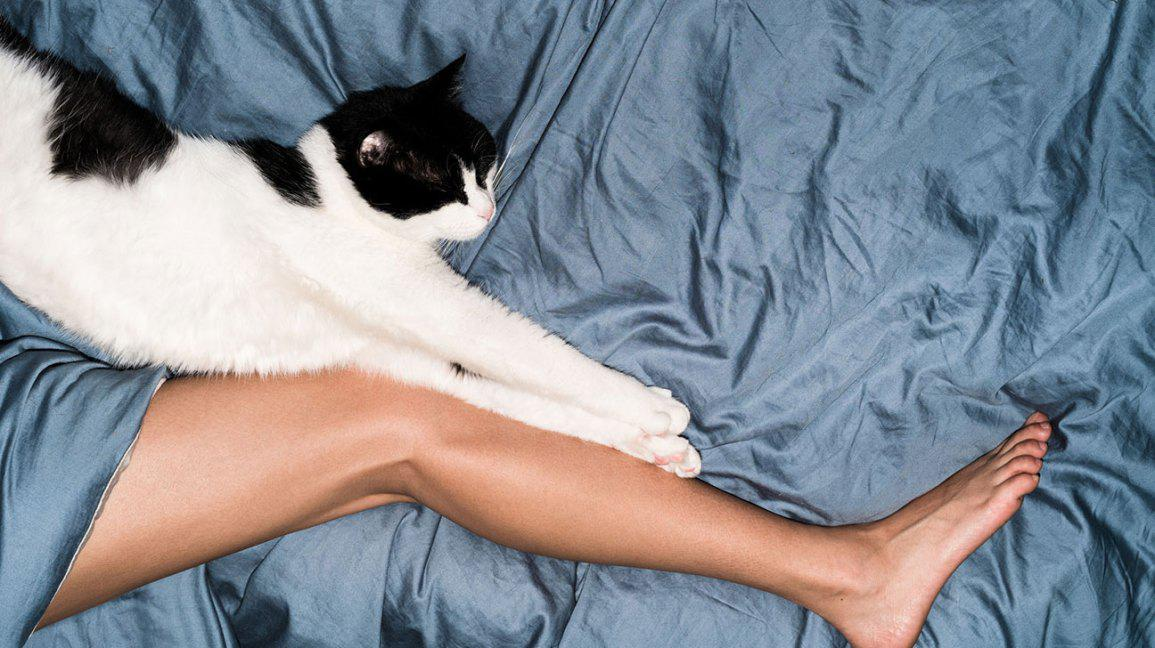

In [35]:

Image.open(path_dict['cats'][22])

In [43]:
path_dict['dogs'][25]

img_45 = cv2.imread(path_dict['dogs'][45])
print(img_45.shape)
img_45

(720, 1280, 3)


array([[[ 14,  73, 113],
        [ 14,  73, 113],
        [ 12,  73, 113],
        ...,
        [ 30,  89, 134],
        [ 35,  94, 139],
        [ 42, 101, 146]],

       [[ 14,  73, 113],
        [ 14,  73, 113],
        [ 12,  73, 113],
        ...,
        [ 30,  89, 134],
        [ 35,  94, 139],
        [ 42, 101, 146]],

       [[ 14,  73, 113],
        [ 14,  73, 113],
        [ 12,  73, 113],
        ...,
        [ 30,  89, 134],
        [ 34,  93, 138],
        [ 42, 101, 146]],

       ...,

       [[130, 208, 231],
        [130, 208, 231],
        [130, 208, 231],
        ...,
        [143, 210, 237],
        [143, 210, 237],
        [143, 210, 237]],

       [[130, 208, 231],
        [130, 208, 231],
        [130, 208, 231],
        ...,
        [143, 210, 237],
        [143, 210, 237],
        [143, 210, 237]],

       [[130, 208, 231],
        [130, 208, 231],
        [130, 208, 231],
        ...,
        [143, 210, 237],
        [143, 210, 237],
        [143, 210, 237]]

In [51]:
resized_img  = cv2.resize(img_45,(224,224))
print(img_45.shape)
print(resized_img.shape)


(720, 1280, 3)
(224, 224, 3)


In [52]:
import matplotlib.pyplot as plt 

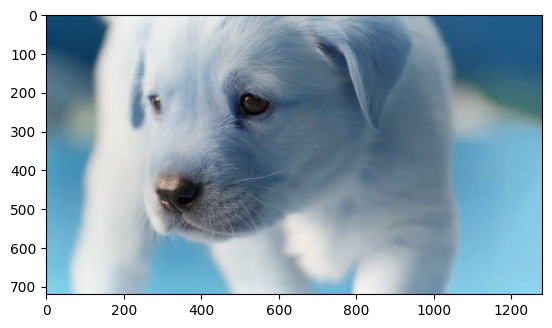

In [56]:
plt.imshow(img_45)

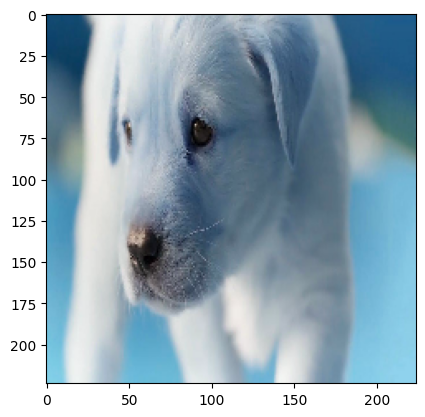

In [55]:
plt.imshow(resized_img)


In [58]:
x = []
y = []
for key , value in path_dict.items(): 
    for img_path in value: 
        img_arr  = cv2.imread(img_path)
        resized_image = cv2.resize(img_arr,(224,224))
        x.append(resized_image)
        y.append(key)
    

In [59]:
len(x)  ,len(y)

(697, 697)

In [64]:
x = np.array(x)

In [67]:
x.ndim  

4

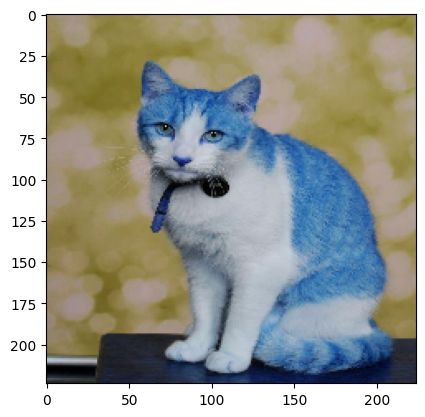

In [76]:
plt.imshow(x[0]/255.0)

In [78]:
x2 = x/255.0 
# x , y 

In [84]:
# cats = 1 , dogs = 0 
y

['cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test, y_train,y_test =train_test_split(x,y,test_size=0.15,random_state=42)

In [82]:
y_train

['dogs',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'dogs',
 'cats',
 'cats',
 'dogs',
 'cats',
 'dogs',
 'dogs',
 'cats',
 'cats',
 'dogs',
 'dogs',
 'cats',
 'dogs',
 'dogs',
 'cats',
 'dogs',
 'dogs',
 'dogs',
 'cats',
 'cats',
 'dogs',
 'cats',
 'dogs',
 'dogs',
 'cats',
 'cats',
 'dogs',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'dogs',
 'dogs',
 'cats',
 'dogs',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'dogs',
 'cats',
 'cats',
 'cats',
 'dogs',
 'cats',
 'cats',
 'cats',
 'dogs',
 'cats',
 'dogs',
 'cats',
 'dogs',
 'cats',
 'dogs',
 'dogs',
 'cats',
 'dogs',
 'dogs',
 'dogs',
 'cats',
 'cats',
 'dogs',
 'cats',
 'cats',
 'dogs',
 'dogs',
 'dogs',
 'cats',
 'dogs',
 'cats',
 'cats',
 'dogs',
 'dogs',
 'dogs',
 'cats',
 'cats',
 'cats',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'dogs',
 'cats',
 'cats',
 'dogs',
 'dogs',
 'cats',
 'dogs',
 'dogs',
 'dogs',
 'cats',
 'dogs',
 'cats',
 'dogs',
 